In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [2]:
data = pd.read_csv('/Users/mohdjunaid/ml 3/dataset.csv')
data.head()


,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0


In [3]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4376 entries, 0 to 4375
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   step            4376 non-null   int64  
 1   type            4376 non-null   object 
 2   amount          4376 non-null   float64
 3   nameOrig        4376 non-null   object 
 4   oldbalanceOrg   4376 non-null   float64
 5   newbalanceOrig  4376 non-null   float64
 6   nameDest        4376 non-null   object 
 7   oldbalanceDest  4376 non-null   float64
 8   newbalanceDest  4376 non-null   float64
 9   isFraud         4376 non-null   int64  
dtypes: float64(5), int64(2), object(3)
memory usage: 342.0+ KB


In [4]:
data.describe()


,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
count,4376.000000,4.376000e+03,4.376000e+03,4.376000e+03,4.376000e+03,4.376000e+03,4376.000000
mean,1.553931,9.630935e+04,9.434943e+05,9.667419e+05,8.193926e+05,9.756817e+05,0.006399
std,0.799610,2.252208e+05,2.124778e+06,2.172805e+06,2.369180e+06,2.793942e+06,0.079744
min,1.000000,6.420000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
25%,1.000000,3.879520e+03,4.775000e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
50%,1.000000,1.074863e+04,2.578589e+04,1.728214e+04,0.000000e+00,0.000000e+00,0.000000
75%,2.000000,1.060147e+05,2.532755e+05,2.502247e+05,3.420953e+05,2.522083e+05,0.000000
max,4.000000,3.776389e+06,1.222588e+07,1.245865e+07,1.951612e+07,1.916920e+07,1.000000


In [5]:
obj = (data.dtypes == 'object')
object_cols = list(obj[obj].index)
print("Categorical variables:", len(object_cols))

int_ = (data.dtypes == 'int')
num_cols = list(int_[int_].index)
print("Integer variables:", len(num_cols))

fl = (data.dtypes == 'float')
fl_cols = list(fl[fl].index)
print("Float variables:", len(fl_cols))


Categorical variables: 3
Integer variables: 2
Float variables: 5


<Axes: xlabel='type', ylabel='count'>

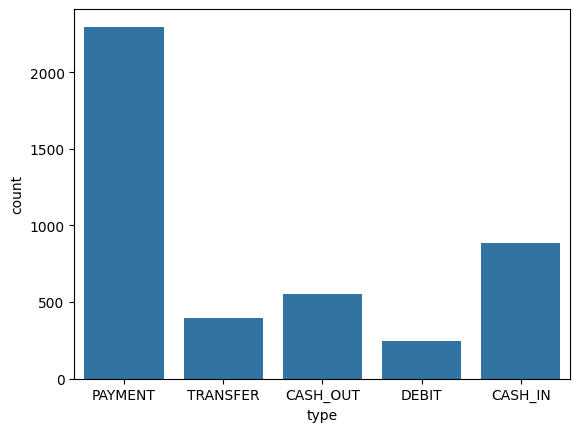

In [6]:
sns.countplot(x='type', data=data)


<Axes: xlabel='type', ylabel='amount'>

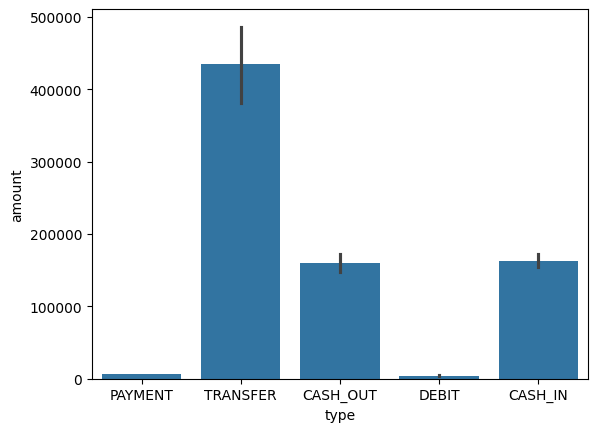

In [7]:
sns.barplot(x='type', y='amount', data=data)


In [8]:
data['isFraud'].value_counts()


isFraud
0    4348
1      28
Name: count, dtype: int64

/var/folders/rc/b54t7zxd2flg0jk0jjcxt6j40000gn/T/ipykernel_56131/2319969707.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['step'], bins=50)


<Axes: xlabel='step', ylabel='Density'>

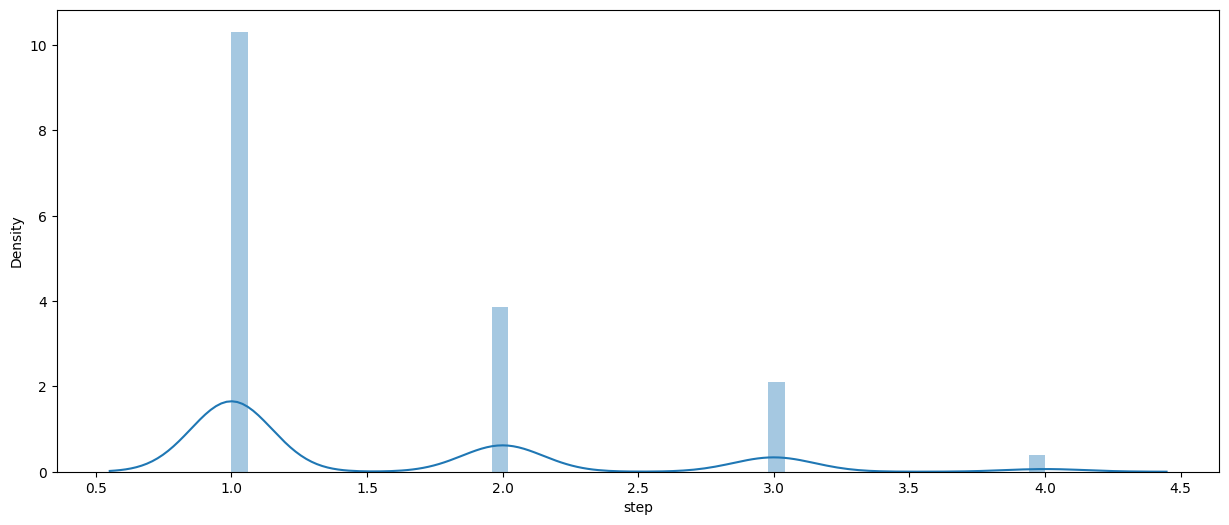

In [9]:
plt.figure(figsize=(15, 6))
sns.distplot(data['step'], bins=50)


<Axes: >

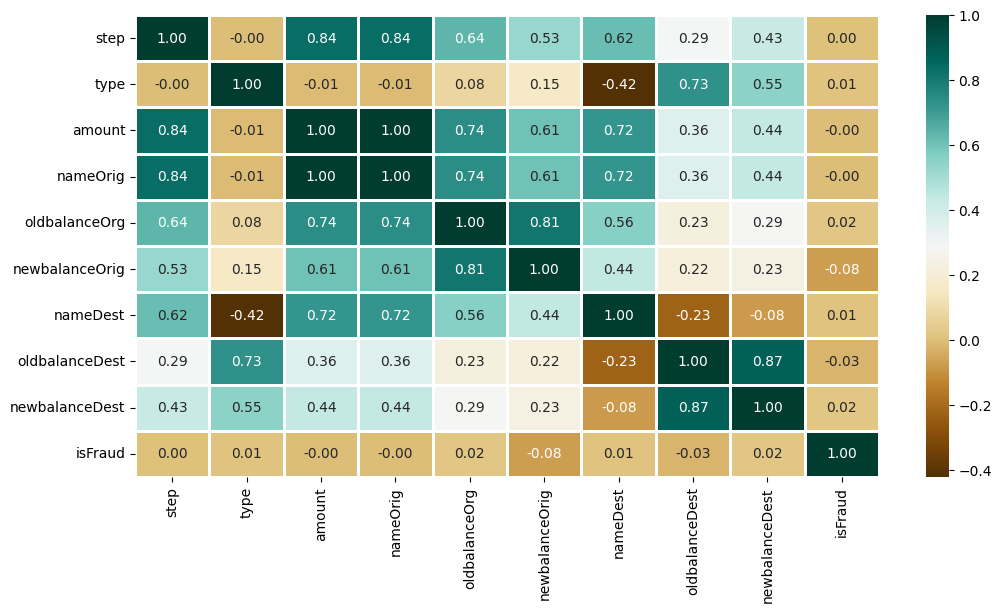

In [10]:
plt.figure(figsize=(12, 6))
sns.heatmap(data.apply(lambda x: pd.factorize(x)[0]).corr(),
            cmap='BrBG',
            fmt='.2f',
            linewidths=2,
            annot=True)


In [11]:
type_new = pd.get_dummies(data['type'], drop_first=True)
data_new = pd.concat([data, type_new], axis=1)
data_new.head()


,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,CASH_OUT,DEBIT,PAYMENT,TRANSFER
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,False,False,True,False
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,False,False,True,False
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,False,False,False,True
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,True,False,False,False
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,False,False,True,False


In [12]:
X = data_new.drop(['isFraud', 'type', 'nameOrig', 'nameDest'], axis=1)
y = data_new['isFraud']


In [13]:
X.shape, y.shape


((4376, 10), (4376,))

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42)


In [15]:
#from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score as ras
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier


In [18]:
models = [LogisticRegression(), 
          RandomForestClassifier(n_estimators=7,
                                 criterion='entropy', 
                                 random_state=7)]

for i in range(len(models)):
    models[i].fit(X_train, y_train)
    print(f'{models[i]} : ')
    
    train_preds = models[i].predict_proba(X_train)[:, 1]
    print('Training Accuracy : ', ras(y_train, train_preds))
    
    y_preds = models[i].predict_proba(X_test)[:, 1]
    print('Validation Accuracy : ', ras(y_test, y_preds))
    print()


LogisticRegression() : 
Training Accuracy :  0.9551581630682476
Validation Accuracy :  0.9578271191174417

RandomForestClassifier(criterion='entropy', n_estimators=7, random_state=7) : 
Training Accuracy :  0.9999613765401104
Validation Accuracy :  0.9070311409021088



/Users/mohdjunaid/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


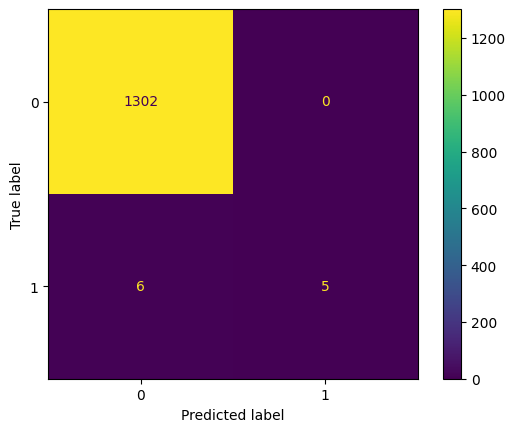

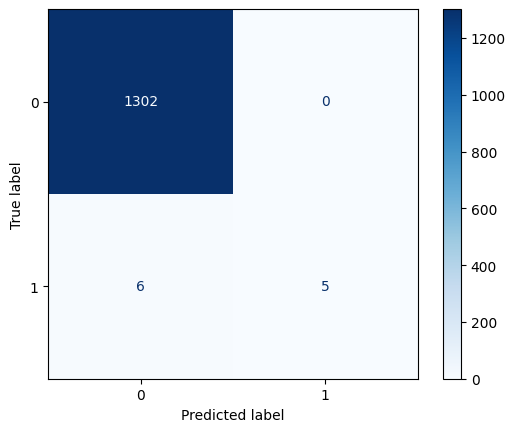

In [19]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

cm = ConfusionMatrixDisplay.from_estimator(models[1], X_test, y_test) 

cm.plot(cmap='Blues') 

plt.show()
